# SentenceTextProcessing_Normalisation


## Importing Libraries

In [347]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


import re
from nltk.corpus import stopwords

In [348]:
from nltk import FreqDist

In [349]:
# Custom ProcessingAndNor.ipynb module to perform PreProcessing and Normalisation for Function reuse
%run ProcessingAndNorm.ipynb

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yash.hemnani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yash.hemnani\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Loading the Sentences Cleaned Dot New Line. CSV

In [350]:
df_sc = pd.read_csv('SentencesCleanedDotNewLine.csv', index_col = [0])

In [351]:
df_sc.head()

,Sentences,Char_Count
0,Dubai Building Code 2021 Edition Contents Part...,1140
1,The content of the DBC is based on the followi...,402
2,The DBC is arranged under themes to integrate ...,288
3,A 2 Dubai Building Code Part A: General A.2 De...,191
4,A.2.1 Terms Addition: Increase to a building’s...,98


Text(0.5, 1.0, 'Null values in given data')

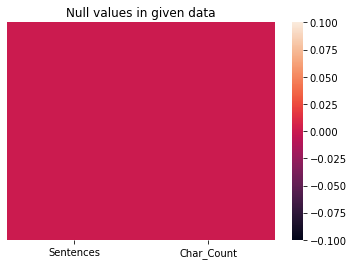

In [352]:
#Heatmap to check null/NaN Values
sns.heatmap(df_sc.isnull(),cbar = True, yticklabels = False)
plt.title('Null values in given data')

## Function Definitions

In [353]:
def Calculate_Len_NoOfWords(df):
    df['length'] = df['Sentences'].apply(len)
    df['word_count'] = df['Sentences'].apply(lambda x: len(str(x).split()))
    return df

#Function to plot more frequent terms

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
    
    
    #selecting top 20 most frequent words
    
    d = words_df.nlargest(columns = "count", n = terms)
    plt.figure(figsize = (20,5))
    ax = sns.barplot(data = d, x = "word", y = 'count')
    ax.set(ylabel = 'count')
    plt.show()

In [354]:
df_sc = Calculate_Len_NoOfWords(df_sc)
df_sc

,Sentences,Char_Count,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,1140,181
1,The content of the DBC is based on the followi...,402,402,53
2,The DBC is arranged under themes to integrate ...,288,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,98,16
...,...,...,...,...
5419,"As a minimum, occupancy sensors shall be provi...",325,325,47
5420,K.10.5 Fire safety systems Emergency lighting ...,190,190,28
5421,"Fire detection and alarm K.10.5.2 Table 8.13, ...",232,232,41
5422,The fire alarm control panel or the monitoring...,246,246,38


In [355]:
del df_sc['Char_Count']
df_sc.head()

,Sentences,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,181
1,The content of the DBC is based on the followi...,402,53
2,The DBC is arranged under themes to integrate ...,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,16


## Processing Experiments

In [356]:
df_sc_copy = df_sc.copy()

In [357]:
df_sc_copy.head()

,Sentences,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,181
1,The content of the DBC is based on the followi...,402,53
2,The DBC is arranged under themes to integrate ...,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,16


In [358]:
#Check Sample text
df_sc_copy['Sentences'].loc[224]

'Right of way (ROW): Strip of land occupied or intended to be occupied by a road, sidewalk, crosswalk, railroad, electric transmission line, oil or gas pipeline, water line, sanitary storm sewer, and other similar uses; the right of one to pass over the property of another'

In [359]:
df_sc_copy = To_Lower(df_sc_copy, 'Sentences')
df_sc_copy = Calculate_Len_NoOfWords(df_sc_copy)

In [360]:
df_sc_copy['Sentences'].loc[1]

'the content of the dbc is based on the following inputs: 1) existing regulations and technical requirements produced by the various authorities and service providers; 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations; 3) benchmarking to international and regional codes'

Discussion: We can see that all the upper case has been changed into lower case. The effect can be seen later on when we create a vector representation which will have a smaller dictionary

In [361]:
df_sc_copy

,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1140,181
1,the content of the dbc is based on the followi...,402,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a: general a.2 de...,191,33
4,a.2.1 terms addition: increase to a building’s...,98,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,190,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",232,41
5422,the fire alarm control panel or the monitoring...,246,38


### Removing Special Characters

In [362]:
df_sc_copy = Remove_Special_Char(df_sc_copy, 'Sentences')
df_sc_copy

C:\Users\yash.hemnani\AppData\Local\Temp\ipykernel_20732\2279212239.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace('[$@#;\\:\[\]\']','')


,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1140,181
1,the content of the dbc is based on the followi...,402,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a general a.2 def...,191,33
4,a.2.1 terms addition increase to a building’s ...,98,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,190,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",232,41
5422,the fire alarm control panel or the monitoring...,246,38


In [363]:
df_sc_copy = Calculate_Len_NoOfWords(df_sc_copy)

In [364]:
df_sc_copy

,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1136,181
1,the content of the dbc is based on the followi...,399,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a general a.2 def...,189,33
4,a.2.1 terms addition increase to a building’s ...,97,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,188,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41
5422,the fire alarm control panel or the monitoring...,246,38


In [365]:
df_sc['length'].nlargest(10)

2418    6469
3587    5453
2529    5082
1589    4537
4978    3605
2417    3409
3450    3361
4136    3356
1915    3346
4447    3321
Name: length, dtype: int64

In [366]:
df_sc_copy['length'].nlargest(10)

2418    6459
3587    5443
2529    4867
1589    4516
4978    3463
2417    3406
3450    3360
1915    3339
4136    3336
4447    3318
Name: length, dtype: int64

In [367]:
#Check change in largest 10 review word count to see any effect

df_sc['word_count'].nlargest(10)

2418    952
4210    887
2529    824
3587    757
3159    739
4208    727
1589    716
4212    696
4214    675
3450    666
Name: word_count, dtype: int64

In [368]:
df_sc_copy['word_count'].nlargest(10)

2418    952
4210    887
3587    757
3159    739
4208    727
1589    716
4212    696
4214    675
3450    666
2529    633
Name: word_count, dtype: int64

In [369]:
df_sc

,Sentences,length,word_count
0,Dubai Building Code 2021 Edition Contents Part...,1140,181
1,The content of the DBC is based on the followi...,402,53
2,The DBC is arranged under themes to integrate ...,288,47
3,A 2 Dubai Building Code Part A: General A.2 De...,191,33
4,A.2.1 Terms Addition: Increase to a building’s...,98,16
...,...,...,...
5419,"As a minimum, occupancy sensors shall be provi...",325,47
5420,K.10.5 Fire safety systems Emergency lighting ...,190,28
5421,"Fire detection and alarm K.10.5.2 Table 8.13, ...",232,41
5422,The fire alarm control panel or the monitoring...,246,38


In [370]:
df_sc_copy

,Sentences,length,word_count
0,dubai building code 2021 edition contents part...,1136,181
1,the content of the dbc is based on the followi...,399,53
2,the dbc is arranged under themes to integrate ...,288,47
3,a 2 dubai building code part a general a.2 def...,189,33
4,a.2.1 terms addition increase to a building’s ...,97,16
...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47
5420,k.10.5 fire safety systems emergency lighting ...,188,28
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41
5422,the fire alarm control panel or the monitoring...,246,38


In [371]:
df_sc_copy['length_change'] = df_sc['length']-df_sc_copy['length']
df_sc_copy['wordcount_change'] = df_sc['word_count']-df_sc_copy['word_count']

df_sc_copy

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,1136,181,4,0
1,the content of the dbc is based on the followi...,399,53,3,0
2,the dbc is arranged under themes to integrate ...,288,47,0,0
3,a 2 dubai building code part a general a.2 def...,189,33,2,0
4,a.2.1 terms addition increase to a building’s ...,97,16,1,0
...,...,...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47,0,0
5420,k.10.5 fire safety systems emergency lighting ...,188,28,2,0
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41,4,0
5422,the fire alarm control panel or the monitoring...,246,38,0,0


In [372]:
print('Average reduction in length per Sentence is', df_sc_copy['length_change'].sum()/(len(df_sc_copy['length_change'])), 'characters')

Average reduction in length per Sentence is 1.611515410958904 characters


In [373]:
df_sc_copy

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,1136,181,4,0
1,the content of the dbc is based on the followi...,399,53,3,0
2,the dbc is arranged under themes to integrate ...,288,47,0,0
3,a 2 dubai building code part a general a.2 def...,189,33,2,0
4,a.2.1 terms addition increase to a building’s ...,97,16,1,0
...,...,...,...,...,...
5419,"as a minimum, occupancy sensors shall be provi...",325,47,0,0
5420,k.10.5 fire safety systems emergency lighting ...,188,28,2,0
5421,"fire detection and alarm k.10.5.2 table 8.13, ...",228,41,4,0
5422,the fire alarm control panel or the monitoring...,246,38,0,0


## Removing Stop Words

In [374]:
#Sample Text

df_sc_copy['Sentences'].loc[1]

'the content of the dbc is based on the following inputs 1) existing regulations and technical requirements produced by the various authorities and service providers 2) interviews with government authorities, service providers, master developers, consultants and other stakeholders to understand gaps or inconsistencies between existing regulations 3) benchmarking to international and regional codes'

In [375]:
df_sc_copy = Remove_Stopwords(df_sc_copy, 'Sentences')
df_sc_copy = Calculate_Len_NoOfWords(df_sc_copy)
df_sc_copy['Sentences'].loc[1]

'content dbc based following inputs 1) existing regulations technical requirements produced various authorities service providers 2) interviews government authorities, service providers, master developers, consultants stakeholders understand gaps inconsistencies existing regulations 3) benchmarking international regional codes'

In [376]:
df_sc['length'].nlargest(10)

2418    6469
3587    5453
2529    5082
1589    4537
4978    3605
2417    3409
3450    3361
4136    3356
1915    3346
4447    3321
Name: length, dtype: int64

In [377]:
df_sc_copy['length'].nlargest(10)

2418    5791
3587    4945
2529    4327
1589    3863
3450    3316
2417    3310
4447    3156
4978    3005
1915    2963
4477    2904
Name: length, dtype: int64

In [378]:
#Check change in largest 10 review word count to see any effect

df_sc['word_count'].nlargest(10)

2418    952
4210    887
2529    824
3587    757
3159    739
4208    727
1589    716
4212    696
4214    675
3450    666
Name: word_count, dtype: int64

In [379]:
df_sc_copy['word_count'].nlargest(10)

2418    780
3450    655
3587    625
3159    572
1589    540
2529    532
4210    502
2417    454
4447    427
1915    418
Name: word_count, dtype: int64

In [380]:
df_sc_copy['length_change'] = df_sc['length']-df_sc_copy['length']
df_sc_copy['wordcount_change'] = df_sc['word_count']-df_sc_copy['word_count']

df_sc_copy

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,974,134,166,47
1,content dbc based following inputs 1) existing...,327,35,75,18
2,dbc arranged themes integrate relevant element...,208,26,80,21
3,2 dubai building code part general a.2 definit...,148,22,43,11
4,a.2.1 terms addition increase building’s gross...,86,12,12,4
...,...,...,...,...,...
5419,"minimum, occupancy sensors shall provided cont...",266,31,59,16
5420,k.10.5 fire safety systems emergency lighting ...,171,23,19,5
5421,"fire detection alarm k.10.5.2 table 8.13, ch. ...",190,30,42,11
5422,fire alarm control panel monitoring panel shal...,190,24,56,14


In [381]:
print('Average reduction in length per Sentence is', df_sc_copy['length_change'].sum()/(len(df_sc_copy['length_change'])), 'characters')

Average reduction in length per Sentence is 56.31720890410959 characters


In [383]:
print('Average reduction in length per Sentence is', df_sc_copy['wordcount_change'].sum()/(len(df_sc_copy['wordcount_change'])), 'words')

Average reduction in length per Sentence is 15.086686643835616 words


## Normalization Experiments

### Stemming

In [384]:
df_sc_s = df_sc_copy.copy()

In [385]:
df_sc_s.head()

,Sentences,length,word_count,length_change,wordcount_change
0,dubai building code 2021 edition contents part...,974,134,166,47
1,content dbc based following inputs 1) existing...,327,35,75,18
2,dbc arranged themes integrate relevant element...,208,26,80,21
3,2 dubai building code part general a.2 definit...,148,22,43,11
4,a.2.1 terms addition increase building’s gross...,86,12,12,4


In [388]:
df_sc_copy['Sentences'].loc[1]

'content dbc based following inputs 1) existing regulations technical requirements produced various authorities service providers 2) interviews government authorities, service providers, master developers, consultants stakeholders understand gaps inconsistencies existing regulations 3) benchmarking international regional codes'

In [386]:
df_sc_s['Sentences'] = Perform_Stemming(df_sc_s['Sentences'])

In [387]:
df_sc_s = Calculate_Len_NoOfWords(df_sc_s)
df_sc_s['Sentences'].loc[1]

'content dbc base follow input 1) exist regul technic requir produc variou author servic provid 2) interview govern authorities, servic providers, master developers, consult stakehold understand gap inconsist exist regul 3) benchmark intern region code'

In [389]:
#Check Change in largest 10 sentences to see any effect

df_sc_copy['length'].nlargest(10)

2418    5791
3587    4945
2529    4327
1589    3863
3450    3316
2417    3310
4447    3156
4978    3005
1915    2963
4477    2904
Name: length, dtype: int64

In [390]:
df_sc_s['length'].nlargest(10)

2418    4755
3587    4235
2529    3712
3450    3243
1589    3179
2417    2872
4447    2696
1915    2549
4978    2548
3159    2450
Name: length, dtype: int64

In [391]:
#Check change in largest 10 review word count to see any effect

df_sc_copy['word_count'].nlargest(10)

2418    780
3450    655
3587    625
3159    572
1589    540
2529    532
4210    502
2417    454
4447    427
1915    418
Name: word_count, dtype: int64

In [392]:
df_sc_s['word_count'].nlargest(10)

2418    780
3450    655
3587    625
3159    572
1589    540
2529    532
4210    502
2417    454
4447    427
1915    418
Name: word_count, dtype: int64

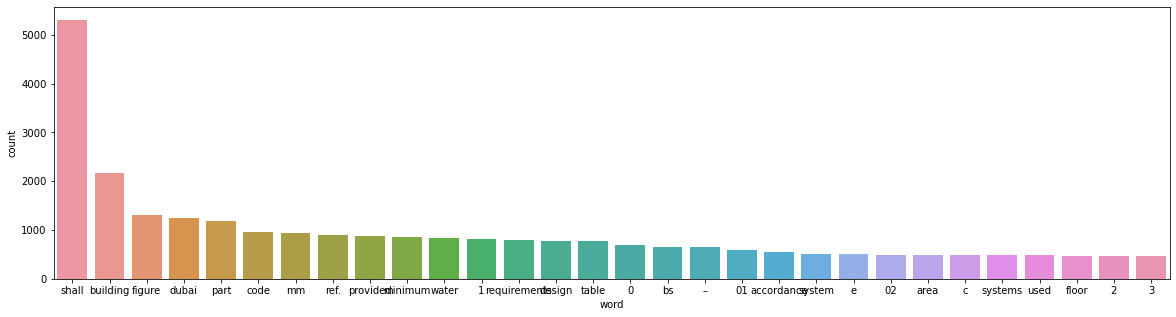

In [393]:
freq_words(df_sc_copy['Sentences'])   #Before

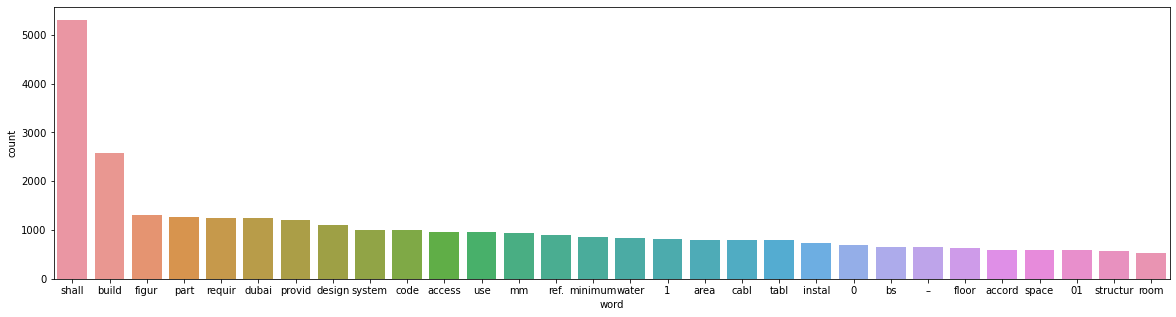

In [394]:
freq_words(df_sc_s['Sentences'])   #After

In [395]:
df_sc_s.head()

,Sentences,length,word_count,length_change,wordcount_change
0,dubai build code 2021 edit content part part b...,791,134,166,47
1,content dbc base follow input 1) exist regul t...,251,35,75,18
2,dbc arrang theme integr relev element build de...,166,26,80,21
3,2 dubai build code part gener a.2 definit note...,131,22,43,11
4,a.2.1 term addit increas building’ gross area ...,80,12,12,4


In [396]:
df_sc_s['length_change'] = df_sc_copy['length']-df_sc_s['length']
df_sc_s['wordcount_change'] = df_sc_copy['word_count']-df_sc_s['word_count']
df_sc_s.to_csv('df_sc_s.csv')